RANDOM CHROMOSOME GENERATION

In [4]:
import random

# Departments including facility 'I'
machines = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
population = []

def generate_population():
    for _ in range(30):  # assuming population size is 30
        chromosome = machines.copy()
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# Call the function to generate the population
generated_population = generate_population()
print("Generated Population:")
for i, chromosome in enumerate(generated_population, start=1):
    print(f"{i}: {chromosome}")

Generated Population:
1: ['D', 'I', 'H', 'B', 'G', 'F', 'C', 'E', 'A']
2: ['A', 'E', 'C', 'F', 'D', 'B', 'I', 'H', 'G']
3: ['D', 'E', 'A', 'H', 'F', 'C', 'I', 'G', 'B']
4: ['H', 'C', 'D', 'G', 'E', 'I', 'B', 'A', 'F']
5: ['C', 'A', 'I', 'G', 'F', 'E', 'D', 'H', 'B']
6: ['C', 'H', 'E', 'D', 'I', 'G', 'F', 'B', 'A']
7: ['G', 'C', 'B', 'H', 'D', 'A', 'E', 'I', 'F']
8: ['F', 'E', 'A', 'I', 'C', 'D', 'G', 'B', 'H']
9: ['D', 'I', 'H', 'C', 'A', 'F', 'E', 'G', 'B']
10: ['G', 'E', 'D', 'I', 'F', 'H', 'C', 'A', 'B']
11: ['F', 'D', 'A', 'B', 'C', 'H', 'I', 'G', 'E']
12: ['E', 'A', 'H', 'F', 'D', 'B', 'G', 'I', 'C']
13: ['A', 'G', 'I', 'C', 'B', 'F', 'D', 'E', 'H']
14: ['F', 'E', 'H', 'A', 'G', 'C', 'D', 'I', 'B']
15: ['G', 'F', 'I', 'B', 'A', 'H', 'C', 'E', 'D']
16: ['H', 'A', 'D', 'B', 'G', 'F', 'E', 'C', 'I']
17: ['E', 'I', 'G', 'A', 'B', 'C', 'F', 'H', 'D']
18: ['H', 'G', 'B', 'E', 'D', 'C', 'F', 'I', 'A']
19: ['E', 'F', 'A', 'G', 'H', 'C', 'B', 'I', 'D']
20: ['B', 'C', 'H', 'F', 'G', 'I', 'D

OBJECTIVE FUNCTION

In [5]:
# Objective function for a facility location problem
def compute_total_cost(flows, distances, costs):
    n = len(flows)  # Number of facilities
    total_cost = 0
    for i in range(n):
        for j in range(n):
            fij = flows[i][j]  # Flow between facility i and j
            dij = distances[i][j]  # Distance between facility i and j
            cij = costs[i][j]  # Cost coefficient between facility i and j
            total_cost += fij * dij * cij
    return total_cost

# Objective function helpers
def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# Input matrices based on the provided tables
flows = [
    [0, 25, 30, 5, 20, 3, 4, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],   
    [0, 0, 0, 0, 0, 0, 0, 0, 0],     # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [15, 0, 0, 0, 0, 0, 0, 0, 0],        # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

distances = [
    [0, 23.5, 31, 31.5, 38, 15.5, 38, 19.5, 31.5],  # From A
    [23.5, 0, 8.5, 25, 31.5, 39, 61.5, 43, 55],     # From B
    [31, 8.5, 0, 16.5, 23, 30.5, 53, 41.5, 46.5],   # From C
    [31.5, 25, 16.5, 0, 6.5, 23, 36.5, 42, 30],     # From D
    [38, 31.5, 23, 6.5, 0, 29.5, 30, 48.5, 36.5],   # From E
    [15.5, 39, 30.5, 23, 29.5, 0, 22.5, 19, 16],    # From F
    [38, 61.5, 53, 36.5, 30, 22.5, 0, 18.5, 6.5],   # From G
    [19.5, 43, 41.5, 42, 48.5, 19, 18.5, 0, 12],    # From H
    [31.5, 55, 46.5, 30, 36.5, 16, 6.5, 12, 0]      # From I
]

costs = [
    [0, 1612500, 1867500, 315000, 1455000, 85500, 111000, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                            
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                                 # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [438750, 0, 0, 0, 0, 0, 0, 0, 0],                           # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Calculate total cost
total_cost_result = compute_total_cost(flows, distances, costs)
print("Total Cost:", total_cost_result)

Total Cost: 3988713375.0


SELECTION

In [6]:
# Re-import needed libraries after reset
import random

# Facility list
facility_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

# Facility positions (mock slicing coordinates)
facility_positions = {
    "A": (5, 15), "B": (15, 15), "C": (25, 15),
    "D": (5, 5), "E": (15, 5), "F": (25, 5),
    "G": (35, 15), "H": (35, 5), "I": (45, 10)
}

# Flow matrix (fij)
flows = [
    [0, 25, 30, 5, 20, 3, 4, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],   
    [0, 0, 0, 0, 0, 0, 0, 0, 0],     # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [15, 0, 0, 0, 0, 0, 0, 0, 0],        # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Distance matrix (dij)
distances = [
    [0, 23.5, 31, 31.5, 38, 15.5, 38, 19.5, 31.5],  # From A
    [23.5, 0, 8.5, 25, 31.5, 39, 61.5, 43, 55],     # From B
    [31, 8.5, 0, 16.5, 23, 30.5, 53, 41.5, 46.5],   # From C
    [31.5, 25, 16.5, 0, 6.5, 23, 36.5, 42, 30],     # From D
    [38, 31.5, 23, 6.5, 0, 29.5, 30, 48.5, 36.5],   # From E
    [15.5, 39, 30.5, 23, 29.5, 0, 22.5, 19, 16],    # From F
    [38, 61.5, 53, 36.5, 30, 22.5, 0, 18.5, 6.5],   # From G
    [19.5, 43, 41.5, 42, 48.5, 19, 18.5, 0, 12],    # From H
    [31.5, 55, 46.5, 30, 36.5, 16, 6.5, 12, 0]      # From I
]


# Cost matrix (cij)
costs = [
    [0, 1612500, 1867500, 315000, 1455000, 85500, 111000, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                            
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                                 # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [438750, 0, 0, 0, 0, 0, 0, 0, 0],                           # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]
# Objective function helpers
def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def compute_total_handling_cost(facility_positions, flows, costs, facility_order):
    total_cost = 0
    for i, fi in enumerate(facility_order):
        for j, fj in enumerate(facility_order):
            if i != j:
                d_ij = manhattan_distance(facility_positions[fi], facility_positions[fj])
                total_cost += flows[i][j] * d_ij * costs[i][j]
    return total_cost

# Generate initial random population
def generate_random_population(facilities, population_size=10):
    population = []
    for _ in range(population_size):
        chromosome = facilities[:]
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

initial_population = generate_random_population(facility_labels, 10)

# Compute fitness for each chromosome
fitness_scores = [
    (chromosome, compute_total_handling_cost(facility_positions, flows, costs, chromosome))
    for chromosome in initial_population
]

# Tournament selection
def tournament_selection(population, fitnesses, tournament_size=3, num_selected=5):
    selected = []
    for _ in range(num_selected):
        contenders = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = min(contenders, key=lambda x: x[1])
        selected.append(winner)
    return selected

population = [chrom for chrom, _ in fitness_scores]
fitness_values = [score for _, score in fitness_scores]

selected_for_mating = tournament_selection(population, fitness_values, tournament_size=3, num_selected=5)
selected_for_mating


[(['D', 'A', 'F', 'H', 'B', 'G', 'I', 'E', 'C'], 2248927500),
 (['C', 'B', 'F', 'E', 'I', 'G', 'D', 'H', 'A'], 1869885000),
 (['E', 'H', 'D', 'B', 'F', 'A', 'C', 'G', 'I'], 1884697500),
 (['D', 'A', 'F', 'H', 'B', 'G', 'I', 'E', 'C'], 2248927500),
 (['D', 'A', 'F', 'H', 'B', 'G', 'I', 'E', 'C'], 2248927500)]

CROSSOVER

In [8]:
import random

# Sample parent pool (20 selected layouts from Step 2)
selected_layouts = [
    ['E', 'C', 'G', 'D', 'A', 'F', 'B', 'H'],
    ['C', 'D', 'G', 'B', 'E', 'F', 'A', 'H'],
    ['E', 'C', 'B', 'H', 'D', 'G', 'F', 'A'],
    ['E', 'H', 'F', 'B', 'A', 'C', 'G', 'D'],
    ['A', 'E', 'F', 'C', 'H', 'B', 'D', 'G'],
    ['E', 'D', 'H', 'C', 'A', 'G', 'F', 'B'],
    ['F', 'A', 'C', 'G', 'B', 'E', 'D', 'H'],
    ['C', 'D', 'E', 'G', 'B', 'F', 'H', 'A'],
    ['G', 'F', 'D', 'A', 'H', 'E', 'B', 'C'],
    ['A', 'H', 'G', 'E', 'D', 'B', 'C', 'F'],
    ['F', 'C', 'D', 'H', 'A', 'B', 'G', 'E'],
    ['F', 'E', 'C', 'A', 'H', 'D', 'G', 'B'],
    ['E', 'A', 'C', 'F', 'G', 'H', 'B', 'D'],
    ['C', 'H', 'F', 'G', 'A', 'B', 'E', 'D'],
    ['E', 'G', 'B', 'C', 'H', 'F', 'D', 'A'],
    ['A', 'C', 'F', 'G', 'B', 'H', 'D', 'E'],
    ['B', 'D', 'E', 'C', 'A', 'H', 'F', 'G'],
    ['G', 'F', 'E', 'A', 'H', 'D', 'B', 'C'],
    ['D', 'H', 'C', 'A', 'F', 'G', 'E', 'B'],
    ['B', 'C', 'A', 'G', 'F', 'H', 'D', 'E']
]

# Function to perform Order Crossover
def order_crossover(parent1, parent2):
    size = len(parent1)
    a, b = sorted(random.sample(range(size), 2))
    
    # Step 1: Copy the slice from Parent1
    child = [None] * size
    child[a:b+1] = parent1[a:b+1]

    # Step 2: Fill the rest from Parent2 in order
    p2_remaining = [gene for gene in parent2 if gene not in child]
    index = 0
    for i in range(size):
        if child[i] is None:
            child[i] = p2_remaining[index]
            index += 1

    return child

# Shuffle and pair parents
random.shuffle(selected_layouts)
offspring_layouts = []

# Generate 10 offspring (5 pairs)
for i in range(0, 10, 1):
    parent1 = selected_layouts[i]
    parent2 = selected_layouts[i+1]
    child = order_crossover(parent1, parent2)
    offspring_layouts.append(child)

# Display offspring
for idx, layout in enumerate(offspring_layouts, 1):
    print(f"Offspring {idx}: {layout}")


Offspring 1: ['C', 'F', 'E', 'A', 'H', 'D', 'G', 'B']
Offspring 2: ['F', 'E', 'C', 'A', 'H', 'D', 'B', 'G']
Offspring 3: ['F', 'A', 'G', 'C', 'H', 'B', 'D', 'E']
Offspring 4: ['C', 'D', 'G', 'H', 'A', 'B', 'E', 'F']
Offspring 5: ['E', 'C', 'G', 'D', 'F', 'B', 'A', 'H']
Offspring 6: ['E', 'C', 'D', 'G', 'A', 'F', 'B', 'H']
Offspring 7: ['E', 'G', 'B', 'C', 'H', 'D', 'F', 'A']
Offspring 8: ['E', 'G', 'B', 'C', 'H', 'F', 'D', 'A']
Offspring 9: ['G', 'A', 'H', 'E', 'D', 'B', 'C', 'F']
Offspring 10: ['F', 'A', 'G', 'D', 'H', 'E', 'B', 'C']


MUTATION

In [12]:
import random

# Assume `offspring_layouts` contains the 10 offspring from the crossover step
# Example:
# offspring_layouts = [
#     ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
#     ...
# ]

def swap_mutation(chromosome, mutation_rate=0.2):
    mutated = chromosome.copy()
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(mutated)), 2)
        mutated[i], mutated[j] = mutated[j], mutated[i]
    return mutated

# Apply mutation to all offspring
mutated_offspring = [swap_mutation(child) for child in offspring_layouts]

# Display mutated results
for idx, layout in enumerate(mutated_offspring, 1):
    print(f"Mutated Offspring {idx}: {layout}")


Mutated Offspring 1: ['C', 'F', 'E', 'A', 'H', 'D', 'G', 'B']
Mutated Offspring 2: ['F', 'E', 'B', 'A', 'H', 'D', 'C', 'G']
Mutated Offspring 3: ['F', 'A', 'G', 'C', 'H', 'B', 'D', 'E']
Mutated Offspring 4: ['C', 'D', 'G', 'H', 'A', 'B', 'E', 'F']
Mutated Offspring 5: ['E', 'C', 'G', 'D', 'F', 'B', 'A', 'H']
Mutated Offspring 6: ['E', 'C', 'D', 'G', 'A', 'F', 'B', 'H']
Mutated Offspring 7: ['E', 'G', 'B', 'C', 'H', 'D', 'F', 'A']
Mutated Offspring 8: ['E', 'G', 'B', 'C', 'H', 'F', 'D', 'A']
Mutated Offspring 9: ['G', 'A', 'H', 'E', 'D', 'B', 'C', 'F']
Mutated Offspring 10: ['F', 'A', 'G', 'D', 'H', 'E', 'B', 'C']


STAGE 5:EVALUATION AND REPLACEMENT

In [ ]:
#the code here

intergration with the slicing method

In [1]:
import random

def generate_random_slicing_chromosome(facilities):
    """
    Generates a random slicing chromosome consisting of:
    - A random permutation of facilities
    - A corresponding list of random slicing directions ('H' or 'V')

    Returns:
    - (facility_sequence, slicing_directions)
    """
    # Random facility order
    facility_sequence = facilities[:]
    random.shuffle(facility_sequence)

    # Random slicing directions: one fewer than the number of facilities
    slicing_directions = [random.choice(['H', 'V']) for _ in range(len(facilities) - 1)]

    return facility_sequence, slicing_directions

# Example: 9 facilities
facilities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
fac_seq, cut_seq = generate_random_slicing_chromosome(facilities)

print("Facility Sequence:", fac_seq)
print("Slicing Directions:", cut_seq)


Facility Sequence: ['B', 'D', 'C', 'E', 'F', 'I', 'G', 'A', 'H']
Slicing Directions: ['V', 'H', 'H', 'H', 'V', 'V', 'H', 'V']


draw

Matplotlib is building the font cache; this may take a moment.


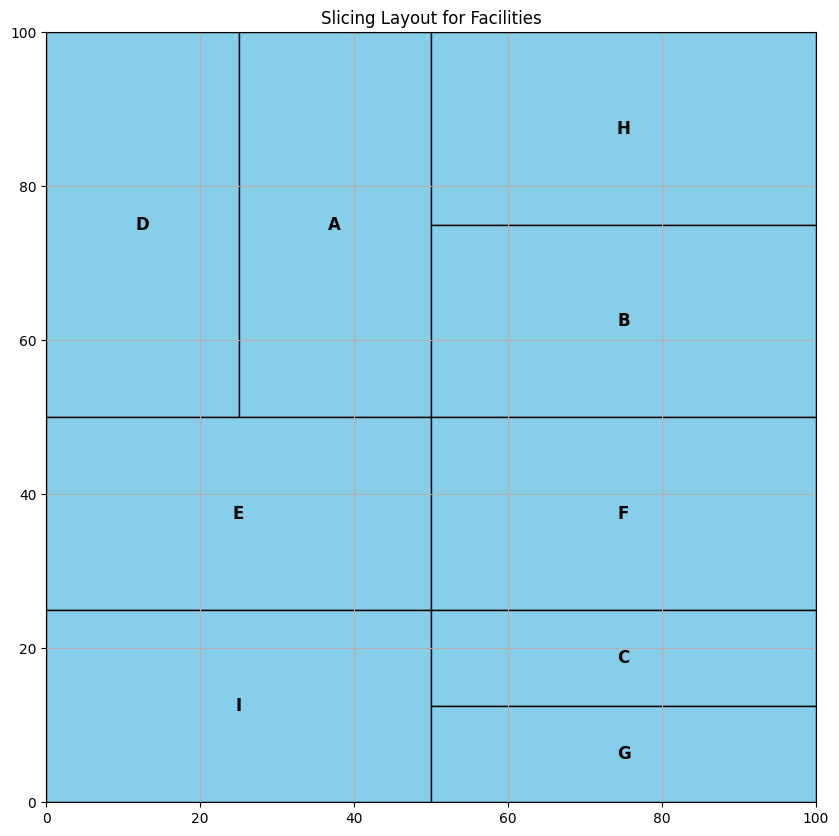

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Facility and slicing input
facilities = ['D', 'A', 'H', 'B', 'E', 'F', 'I', 'C', 'G']
slicing_directions = ['H', 'V', 'V', 'H', 'H', 'V', 'V', 'H']  # 8 cuts for 9 facilities

layout_width = 100
layout_height = 100

def recursive_slicing(x, y, width, height, facilities, cuts, cut_index=0):
    if len(facilities) == 1:
        return [(facilities[0], (x, y, width, height))]

    cut = cuts[cut_index]
    mid = len(facilities) // 2
    left = facilities[:mid]
    right = facilities[mid:]

    result = []
    if cut == 'H':
        h1 = height / 2
        result += recursive_slicing(x, y + h1, width, h1, left, cuts, cut_index + 1)
        result += recursive_slicing(x, y, width, h1, right, cuts, cut_index + 1 + len(left) - 1)
    else:  # 'V'
        w1 = width / 2
        result += recursive_slicing(x, y, w1, height, left, cuts, cut_index + 1)
        result += recursive_slicing(x + w1, y, w1, height, right, cuts, cut_index + 1 + len(left) - 1)

    return result

# Generate positions
facility_positions = recursive_slicing(0, 0, layout_width, layout_height, facilities, slicing_directions)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
for name, (x, y, w, h) in facility_positions:
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='skyblue'))
    ax.text(x + w / 2, y + h / 2, name, ha='center', va='center', fontsize=12, weight='bold')

ax.set_xlim(0, layout_width)
ax.set_ylim(0, layout_height)
ax.set_title("Slicing Layout for Facilities")
ax.set_aspect('equal')
plt.grid(True)
plt.show()


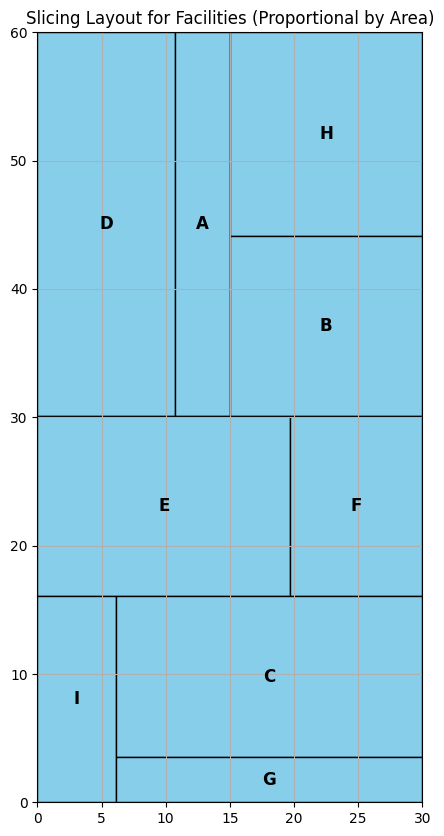

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Facility and slicing input
facilities = ['D', 'A', 'H', 'B', 'E', 'F', 'I', 'C', 'G']
slicing_directions = ['H', 'V', 'V', 'H', 'H', 'V', 'V', 'H']  # 8 cuts for 9 facilities

# Actual width × length (W × L) for area computation
facility_dimensions = {
    'A': (8, 16),   # W×L = 128
    'B': (7, 30),   # 210
    'C': (10, 30),  # 300
    'D': (7, 46),   # 322
    'E': (6, 46),   # 276
    'F': (16, 9),   # 144
    'G': (6, 14),   # 84
    'H': (17, 14),  # 238
    'I': (7, 14)    # 98
}

# Layout canvas dimensions
layout_width = 30
layout_height = 60

def recursive_slicing_weighted(x, y, width, height, facilities, cuts, cut_index=0):
    if len(facilities) == 1:
        return [(facilities[0], (x, y, width, height))]

    cut = cuts[cut_index]
    mid = len(facilities) // 2
    left = facilities[:mid]
    right = facilities[mid:]

    # Calculate proportional area
    left_area = sum(facility_dimensions[f][0] * facility_dimensions[f][1] for f in left)
    right_area = sum(facility_dimensions[f][0] * facility_dimensions[f][1] for f in right)
    total_area = left_area + right_area

    result = []
    if cut == 'H':
        h1 = height * (left_area / total_area)
        result += recursive_slicing_weighted(x, y + (height - h1), width, h1, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x, y, width, height - h1, right, cuts, cut_index + 1 + len(left) - 1)
    else:  # 'V'
        w1 = width * (left_area / total_area)
        result += recursive_slicing_weighted(x, y, w1, height, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x + w1, y, width - w1, height, right, cuts, cut_index + 1 + len(left) - 1)

    return result

# Generate facility positions
facility_positions = recursive_slicing_weighted(0, 0, layout_width, layout_height, facilities, slicing_directions)

# Plot the layout
fig, ax = plt.subplots(figsize=(10, 10))
for name, (x, y, w, h) in facility_positions:
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='skyblue'))
    ax.text(x + w / 2, y + h / 2, name, ha='center', va='center', fontsize=12, weight='bold')

ax.set_xlim(0, layout_width)
ax.set_ylim(0, layout_height)
ax.set_title("Slicing Layout for Facilities (Proportional by Area)")
ax.set_aspect('equal')
plt.grid(True)
plt.show()
